<a href="https://www.kaggle.com/neratdazam/spam-text-classification?scriptVersionId=85821231" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **IMPORT LIBRARIES**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import regex as re
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer


# **READ FILE**

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
message_data=pd.read_csv('/kaggle/input/spam-text-message-classification/SPAM text message 20170820 - Data.csv')
message_data.head()
message_data.info()

/kaggle/input/spam-text-message-classification/SPAM text message 20170820 - Data.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [3]:
message_data['Length']= message_data["Message"].apply(len)
message_data.head()
 

,Category,Message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [4]:
message_data['Length'].max()

910

In [5]:
message_data.groupby('Category').describe()

Length                                                       
           count       mean        std  min    25%    50%    75%    max
Category                                                               
ham       4825.0   71.44829  58.434864  2.0   33.0   52.0   93.0  910.0
spam       747.0  137.98929  29.980287  7.0  132.0  149.0  157.0  223.0

<AxesSubplot:xlabel='Category', ylabel='count'>

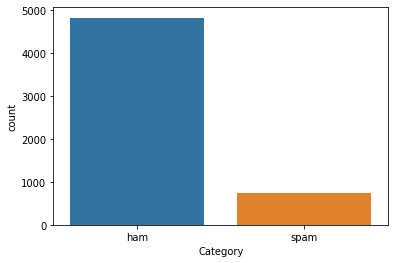

In [6]:
sns.countplot(x=message_data.Category)

# **WORD CLOUD FOR SPAM AND HAM MESSAGES**

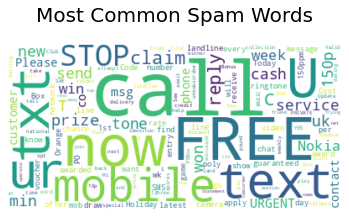

In [7]:
spam_messages = message_data[message_data.Category == 'spam']

spam_texts = " ".join(text for text in spam_messages['Message'])

spam_cloud = WordCloud(background_color = 'white', max_words=150, collocations = False).generate(spam_texts)

plt.imshow(spam_cloud, interpolation='bilinear')
plt.title('Most Common Spam Words', fontsize=20, y=1.1)
plt.axis("off");

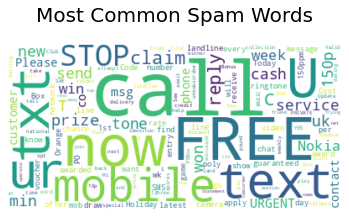

In [8]:
ham_messages= message_data[message_data.Category == 'ham']

ham_texts= " ".join(text for text in ham_messages["Message"])

ham_cloud = WordCloud(background_color = 'white', max_words=150, collocations = False).generate(spam_texts)

plt.imshow(spam_cloud, interpolation='bilinear')
plt.title('Most Common Spam Words', fontsize=20, y=1.1)
plt.axis("off");

In [9]:
x=message_data['Message']
message_data['Numeric Category']= message_data["Category"].apply(lambda x: 1 if x=="spam" else 0)
y=message_data['Numeric Category']

In [10]:
contractions = { 
"ain't": "am not","aren't": "are not","can't": "cannot","can't've": "cannot have",
"'cause": "because","could've": "could have","couldn't": "could not","couldn't've": "could not have",
"didn't": "did not","doesn't": "does not","don't": "do not","hadn't": "had not",
"hadn't've": "had not have","hasn't": "has not","haven't": "have not","he'd": "he would",
"he'd've": "he would have","he'll": "he will","he's": "he is","how'd": "how did",
"how'll": "how will","how's": "how is","i'd": "i would","i'll": "i will",
"i'm": "i am","i've": "i have","isn't": "is not","it'd": "it would","it'll": "it will",
"it's": "it is","let's": "let us","ma'am": "madam","mayn't": "may not",
"might've": "might have","mightn't": "might not","must've": "must have","mustn't": "must not",
"needn't": "need not","oughtn't": "ought not","shan't": "shall not","sha'n't": "shall not",
"she'd": "she would","she'll": "she will","she's": "she is","should've": "should have",
"shouldn't": "should not","that'd": "that would","that's": "that is","there'd": "there had",
"there's": "there is","they'd": "they would","they'll": "they will","they're": "they are",
"they've": "they have","wasn't": "was not","we'd": "we would","we'll": "we will",
"we're": "we are","we've": "we have","weren't": "were not","what'll": "what will",
"what're": "what are","what's": "what is","what've": "what have","where'd": "where did",
"where's": "where is","who'll": "who will","who's": "who is","won't": "will not",
"wouldn't": "would not","you'd": "you would","you'll": "you will","you're": "you are"
}

In [11]:
# Convert words to lower case
for i in range(len(x)):
    text = re.sub('[^a-zA-Z]',' ',x[i])
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    text=text.lower()
    text=word_tokenize(text)
    stemmer=PorterStemmer()
    stopword = set(stopwords.words("english"))
    text=[stemmer.stem(words) for words in text if words not in stopword]
    x[i]=' '.join(text)
    
    # Replace contractions with their longer forms 
    if True:
        #text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        x[i]= " ".join(new_text)
    
        
        

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# TRANSFORM DATA INTO NUMERICAL VALUE

In [12]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(x).toarray()


# **SPLIT DATA**

In [13]:
x_train,x_test, y_train, y_test= train_test_split(X,y, test_size= 0.3, random_state=30)

# **NAIVE BAYES CLASSIFIER**

In [14]:
NBmodel=MultinomialNB()
NBmodel.fit(x_train, y_train)
NBmodel_predict=NBmodel.predict(x_test)

NBaccuracy = accuracy_score(y_test, NBmodel_predict)

print("Accuracy Score:", NBaccuracy)
print(classification_report(y_test, NBmodel_predict))

Accuracy Score: 0.9766746411483254
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1459
           1       0.88      0.94      0.91       213

    accuracy                           0.98      1672
   macro avg       0.94      0.96      0.95      1672
weighted avg       0.98      0.98      0.98      1672



# **KNN CLASSIFIER**

In [15]:
KNNmodel= KNeighborsClassifier(n_neighbors=2)
KNNmodel.fit(x_train, y_train)
KNNmodel_predict=KNNmodel.predict(x_test)
KNNaccuracy = accuracy_score(y_test, KNNmodel_predict)
print("Accuracy Score:", KNNaccuracy)
print(classification_report(y_test,KNNmodel_predict))

Accuracy Score: 0.9342105263157895
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1459
           1       1.00      0.48      0.65       213

    accuracy                           0.93      1672
   macro avg       0.96      0.74      0.81      1672
weighted avg       0.94      0.93      0.92      1672



# **DECISION TREE CLASSIFIER**

In [16]:
DTmodel= DecisionTreeClassifier()
DTmodel.fit(x_train, y_train)
DTmodel_predict=DTmodel.predict(x_test)
DTaccuracy = accuracy_score(y_test, DTmodel_predict)
print("Accuracy Score:", DTaccuracy)
print(classification_report(y_test,DTmodel_predict))

Accuracy Score: 0.97188995215311
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1459
           1       0.92      0.85      0.89       213

    accuracy                           0.97      1672
   macro avg       0.95      0.92      0.93      1672
weighted avg       0.97      0.97      0.97      1672



# **RANDOM FOREST**

In [17]:
RFmodel= RandomForestClassifier()
RFmodel.fit(x_train, y_train)
RFmodel_predict=RFmodel.predict(x_test)
RFaccuracy = accuracy_score(y_test, RFmodel_predict)
print("Accuracy Score:", RFaccuracy)
print(classification_report(y_test,RFmodel_predict))

Accuracy Score: 0.979066985645933
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1459
           1       1.00      0.84      0.91       213

    accuracy                           0.98      1672
   macro avg       0.99      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672

